In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import re
from bertopic import BERTopic
from wordcloud import WordCloud

In [10]:
print("Importing data and building DataFrame:")
start_time = time.time()
with open('data/cleanedAggregateData.json', 'r') as f:
    data = json.load(f)
end_time = time.time()
load_time = end_time - start_time
print("Data load time", load_time)
print(data[0])

Importing data and building DataFrame:
Data load time 0.011999368667602539
{'id': 'EJ1013917', 'title': 'Enhancing the Autonomous Use of CALL: A New Curriculum Model in EFL', 'author': 'Smith, Karen, Craig, Hana', 'description': "This action research study evaluates the effectiveness of a CALL Learner Autonomy (CALL LA) course at a Japanese university. The &quot;C course&quot; blends face-to-face instruction and independent study in a CALL environment. It aims to enhance learners' autonomous use of CALL in the acquisition of English as a Foreign Language (EFL). In this study, three learning support aids were trialed: the Learner Passport, the e-Language Learning Portfolio and the e-Learner Self-Reflection Diary. The participant- researchers examined the course using data from the trial materials, observation, their own reflexive practice, learner questionnaires, interviews, artifacts and learner self-reflections. Findings indicate that teachers' and learners' consciousness was raised a

In [17]:
print("Data loaded, converting to DataFrame")
start_time = time.time()
df = pd.DataFrame(data)
end_time = time.time()
convert_time = end_time - start_time
print("Data successfully converted to DataFrame. Conversion time:", convert_time)
print(df.columns)
print(df.dtypes)
print("Number of missing values in docs:", sum(x is None for x in docs))
print("Number of missing values in pub_dates:", sum(x is None for x in pub_dates))



Data loaded, converting to DataFrame
Data successfully converted to DataFrame. Conversion time: 0.0030035972595214844
Index(['id', 'title', 'author', 'description', 'subject', 'source',
       'publicationdateyear', 'identifiersgeo'],
      dtype='object')
id                     object
title                  object
author                 object
description            object
subject                object
source                 object
publicationdateyear     int64
identifiersgeo         object
dtype: object
Number of missing values in docs: 0
Number of missing values in pub_dates: 0


In [19]:
model = BERTopic(verbose=True, embedding_model="all-mpnet-base-v2")
#embeddingmodel embedding_model="all-MiniLM-L6-v2" or embedding_mode="all-mpnet-base-v2"
docs = df.subject.astype(str).to_list()
pub_dates = df.publicationdateyear.to_list()
topics, probabilities = model.fit_transform(docs)
topics_over_time = model.topics_over_time(docs, pub_dates)
model.get_topic_info()

Batches: 100%|██████████| 39/39 [01:29<00:00,  2.30s/it]
2023-06-18 07:33:12,497 - BERTopic - Transformed documents to Embeddings
2023-06-18 07:33:16,350 - BERTopic - Reduced dimensionality
2023-06-18 07:33:16,397 - BERTopic - Clustered reduced embeddings
12it [00:00, 64.99it/s]


,Topic,Count,Name
0,-1,365,-1_language_second_learning_instruction
1,0,195,0_language_second_tests_english
2,1,133,1_writing_composition_second_instruction
3,2,71,2_communication_intercultural_cultural_mediated
4,3,61,3_assisted_computer_learning_language
5,4,57,4_teacher_teachers_technology_education
6,5,48,5_chinese_language_mandarin_instruction
7,6,41,6_technology_student_in_education
8,7,40,7_communication_synchronous_mediated_computer
9,8,37,8_pronunciation_instruction_second_language


In [20]:
def create_wordcloud(model, topic):
     text = {word: value for word, value in model.get_topic(topic)}
     wc = WordCloud(background_color="white", max_words=1000)
     wc.generate_from_frequencies(text)
     plt.imshow(wc, interpolation="bilinear")
     plt.axis("off")
     plt.show()

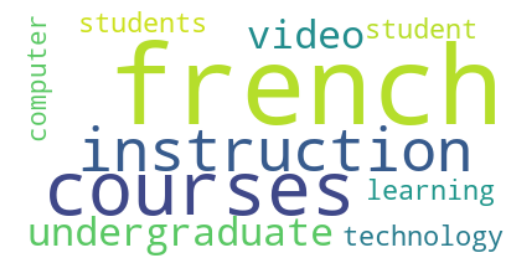

In [21]:
create_wordcloud(model, topic=14)

In [22]:
model.visualize_topics()

In [24]:
topics_to_include = list(range(0, 17))
model.visualize_barchart(topics= topics_to_include, width=300)

In [25]:
model.visualize_hierarchy()

In [26]:
hierarchical_topics = model.hierarchical_topics(docs)
model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 16/16 [00:00<00:00, 313.70it/s]


In [27]:
model.visualize_heatmap()

In [28]:
model.visualize_topics_over_time(topics_over_time, topics=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
#can innclude topics changing topics_over_time TO topics_over_time, topics=[x, y, z, etc.]

In [30]:
model.visualize_topics_over_time(topics_over_time, topics=[10, 11, 12, 13, 14, 15, 16])


In [31]:
model.visualize_topics_over_time(topics_over_time)

In [32]:
#Extract topics-document assignments
document_topics = []
for i, topic in enumerate(topics):
    document_id = df.loc[i, 'id']
    document_title = df.loc[i, 'title']
    document_topics.append({'id': document_id, 'title': document_title, 'topic': topic})
    #Export to JSON
with open('mpnet_keywords_topics.json', 'w') as f:
    json.dump(document_topics, f)